In [40]:
import pandas as pd
import numpy as np


#Load taxonomy data
taxonomy_df = pd.read_csv('../data/raw/2024/eBird_Taxonomy_v2021.csv')
metadata_df = pd.read_csv('../data/raw/2024/train_metadata.csv')

In [41]:
taxonomy_df.head()

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [42]:
taxonomy_df.head()
#Remove rows where species_code is NaN
taxonomy_df = taxonomy_df.dropna(subset=['SPECIES_CODE', 'ORDER1', 'FAMILY'])
taxonomy_df.head()

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [43]:
taxonomy_df

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN
...,...,...,...,...,...,...,...,...,...
16746,34686,species,gobsal1,Golden-billed Saltator,Saltator aurantiirostris,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN
16747,34693,species,massal1,Masked Saltator,Saltator cinctus,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN
16748,34694,species,slcgro1,Slate-colored Grosbeak,Saltator grossus,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN
16749,34697,species,bltgro2,Black-throated Grosbeak,Saltator fuliginosus,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN


In [44]:
metadata_df.head()
#Get all unique primary labels
all_primary_labels = metadata_df["primary_label"].unique()

In [6]:
len(taxonomy_df)

32862

In [46]:
#Merge taxonomy data with metadata based on species_code

merged_df = pd.merge(left=metadata_df, right=taxonomy_df[['SPECIES_CODE', 'ORDER1', 'FAMILY']], how='inner', left_on="primary_label", right_on="SPECIES_CODE")
merged_df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename,SPECIES_CODE,ORDER1,FAMILY
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg,asbfly,Passeriformes,Muscicapidae (Old World Flycatchers)
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg,asbfly,Passeriformes,Muscicapidae (Old World Flycatchers)
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg,asbfly,Passeriformes,Muscicapidae (Old World Flycatchers)
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg,asbfly,Passeriformes,Muscicapidae (Old World Flycatchers)
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg,asbfly,Passeriformes,Muscicapidae (Old World Flycatchers)


In [47]:
len(merged_df)

24459

In [48]:
#Get unique primary labels
after_primary_labels = merged_df["primary_label"].unique()

In [49]:
#Difference between all primary labels and after primary labels
np.setdiff1d(all_primary_labels, after_primary_labels)

array([], dtype=object)

In [53]:
# Get drop duplicates of primary labels
new_merged_df = merged_df.drop_duplicates(subset=['primary_label'])

In [55]:
#Only get the columns we need (primary_label, ORDER1, FAMILY)

new_merged_df = new_merged_df[['primary_label', 'ORDER1', 'FAMILY']]

<Axes: xlabel='ORDER1', ylabel='count'>

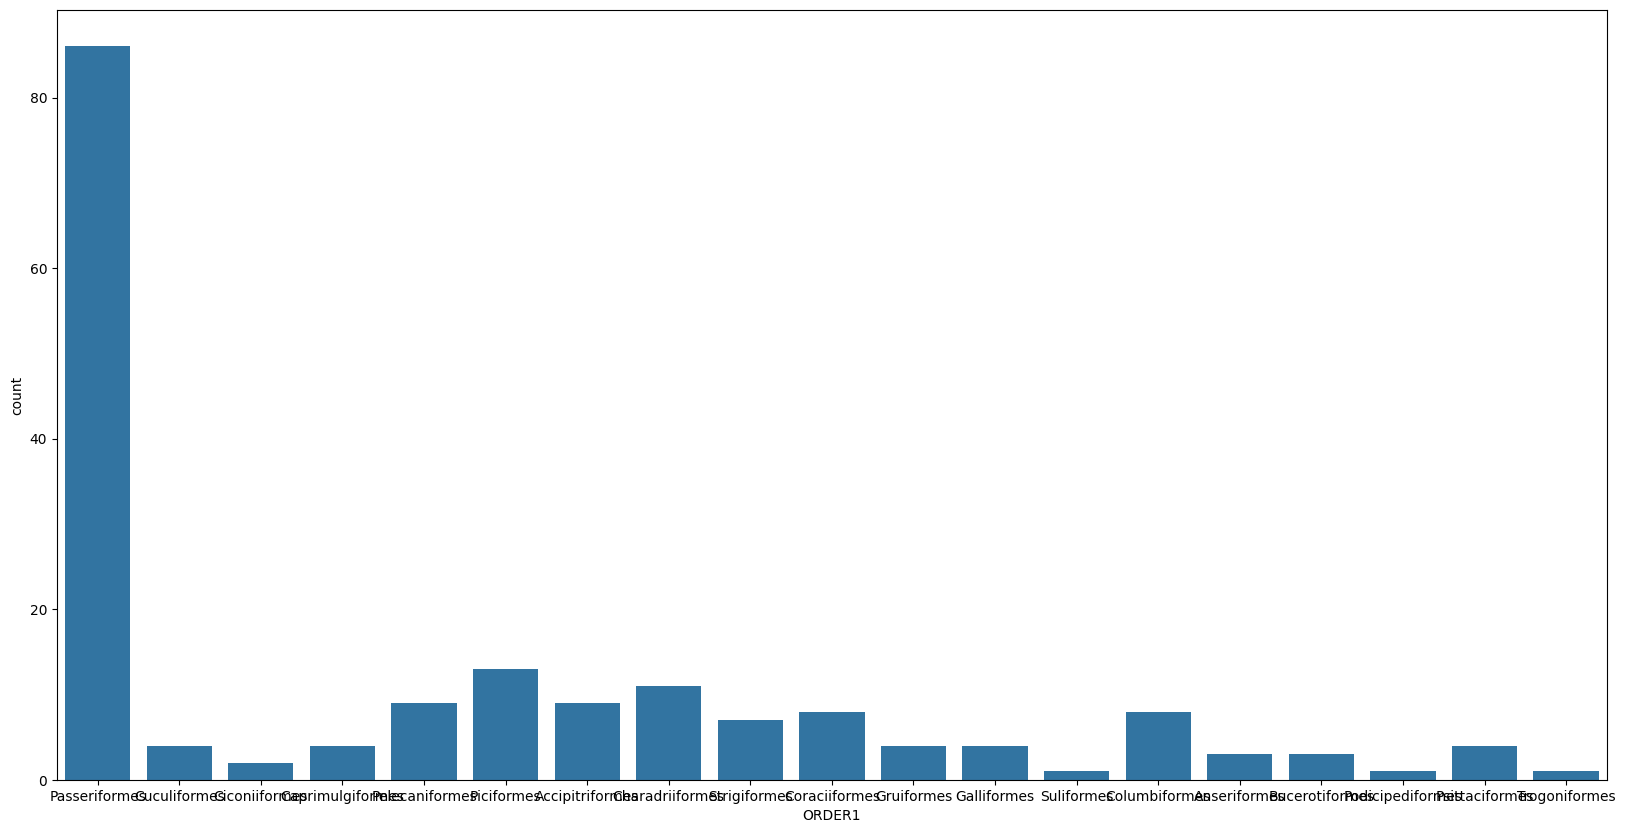

In [60]:
#Barplot of ORDER1
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.countplot(data=new_merged_df, x='ORDER1')

<Axes: xlabel='count', ylabel='FAMILY'>

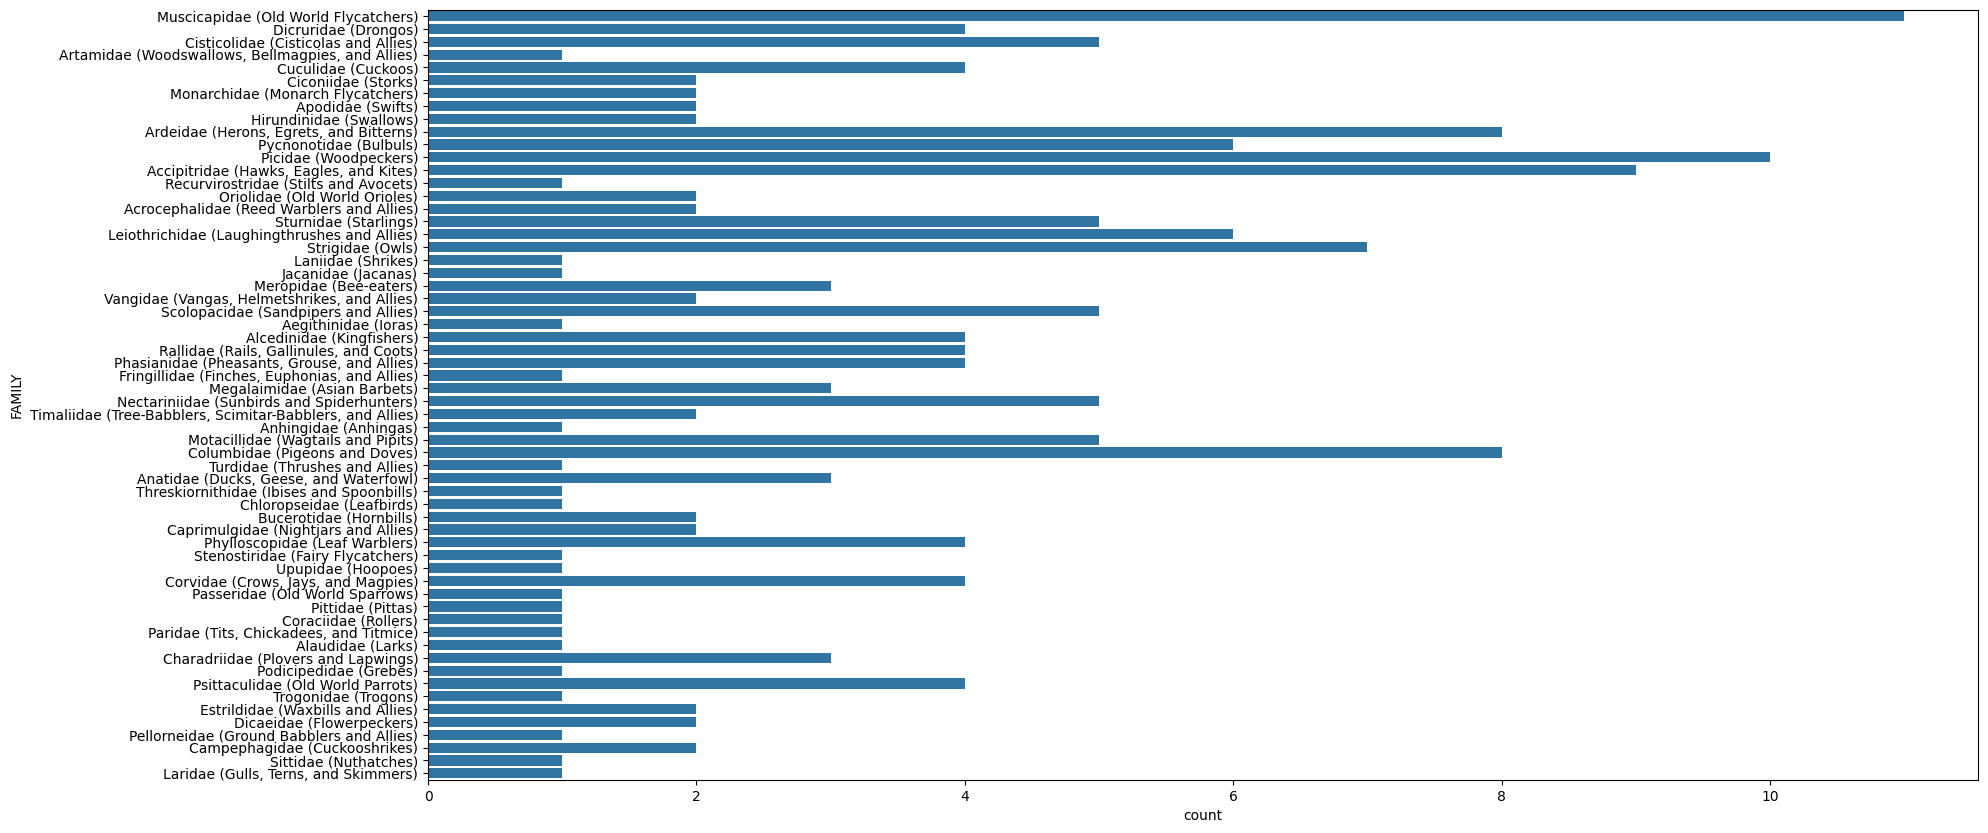

In [62]:
#Barplot of FAMILY
plt.figure(figsize=(20, 10))
sns.countplot(data=new_merged_df, y='FAMILY')

<Axes: xlabel='count', ylabel='ORDER1'>

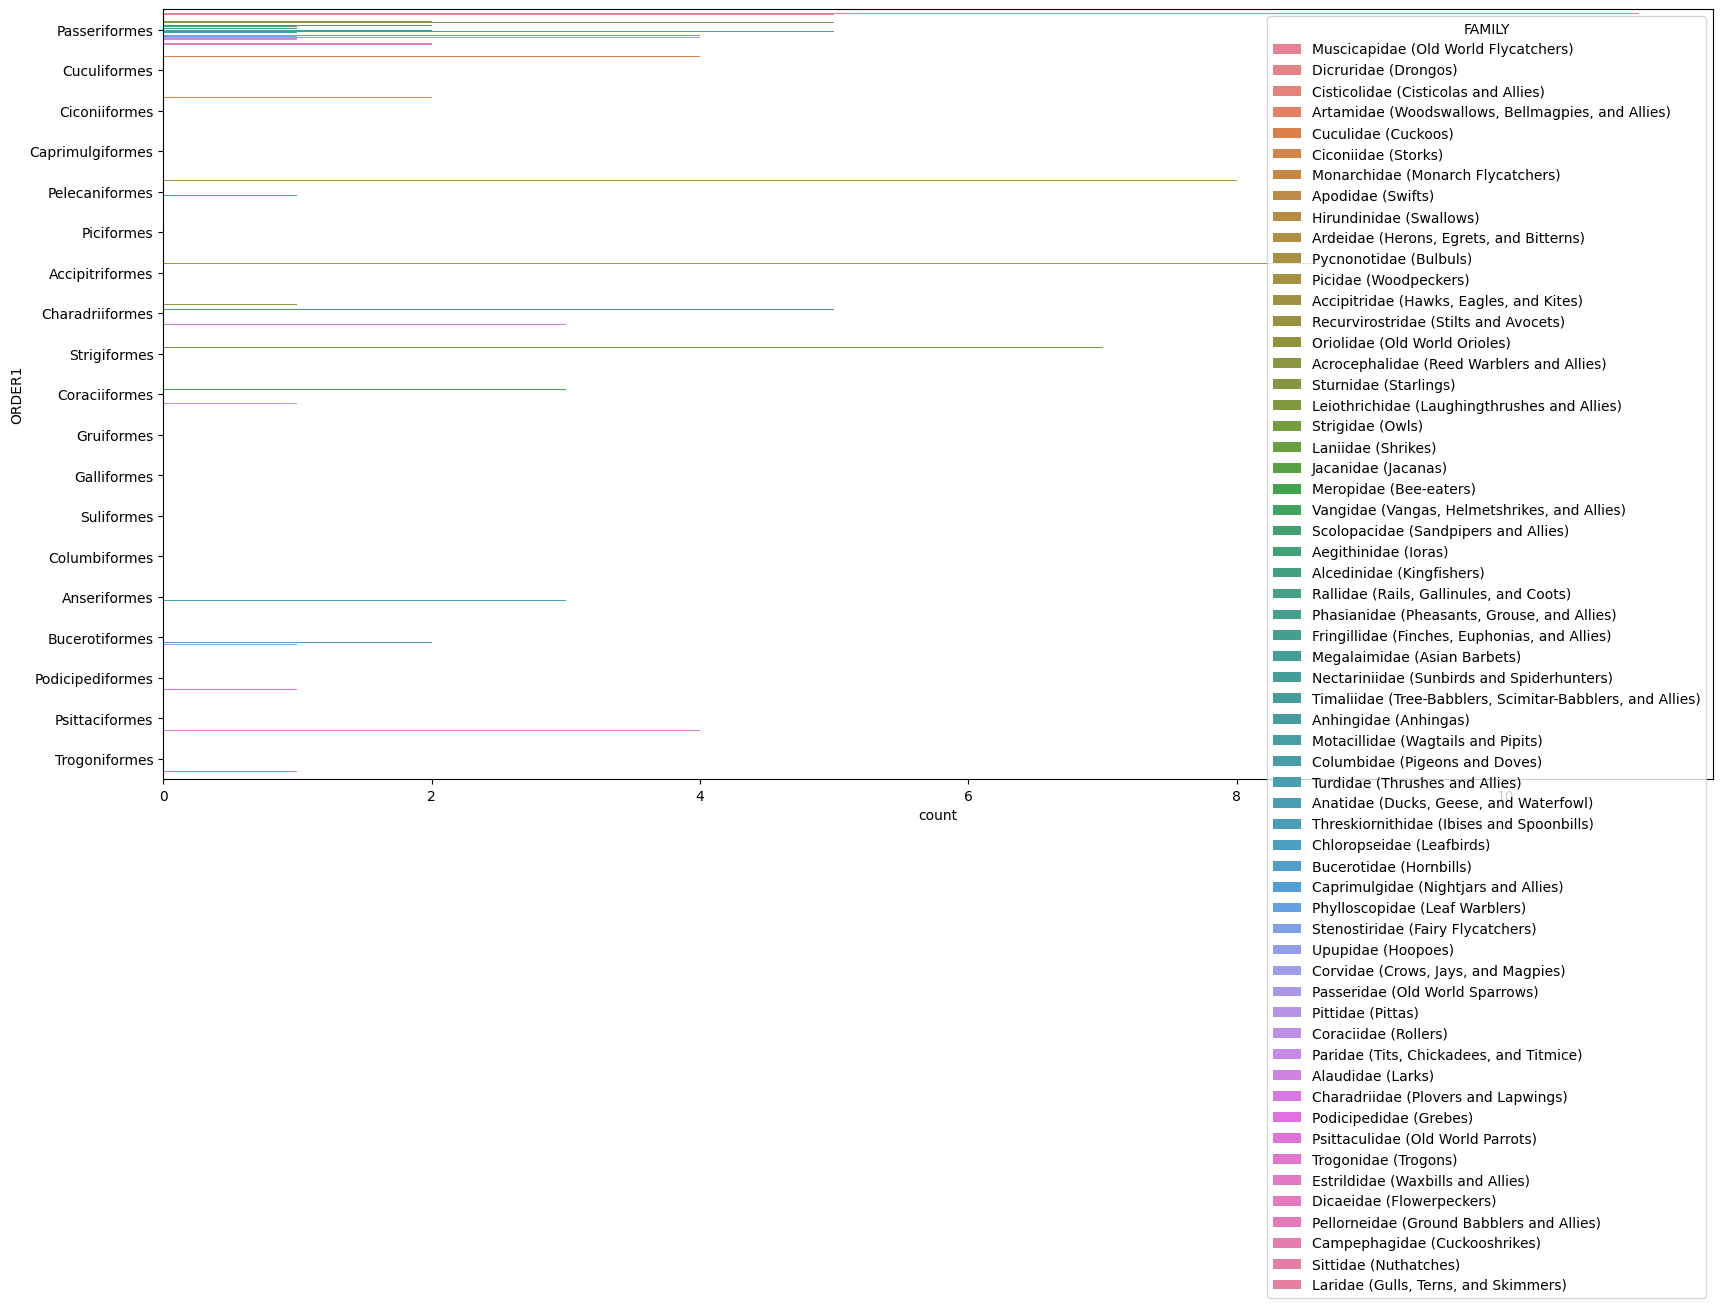

In [65]:
#Create hierarchical plot of ORDER1 and FAMILY
plt.figure(figsize=(20, 10))
sns.countplot(data=new_merged_df, y='ORDER1', hue='FAMILY')


In [71]:
new_merged_df[new_merged_df["ORDER1"] == "Gruiformes"]

,primary_label,ORDER1,FAMILY
6003,commoo3,Gruiformes,"Rallidae (Rails, Gallinules, and Coots)"
9572,eurcoo,Gruiformes,"Rallidae (Rails, Gallinules, and Coots)"
19530,purswa3,Gruiformes,"Rallidae (Rails, Gallinules, and Coots)"
22623,whbwat1,Gruiformes,"Rallidae (Rails, Gallinules, and Coots)"


In [63]:
#Get length of unique orders and families
len(new_merged_df['ORDER1'].unique()), len(new_merged_df['FAMILY'].unique())


(19, 60)

In [72]:
new_merged_df.head()

,primary_label,ORDER1,FAMILY
0,asbfly,Passeriformes,Muscicapidae (Old World Flycatchers)
105,ashdro1,Passeriformes,Dicruridae (Drongos)
214,ashpri1,Passeriformes,Cisticolidae (Cisticolas and Allies)
310,ashwoo2,Passeriformes,"Artamidae (Woodswallows, Bellmagpies, and Allies)"
355,asikoe2,Cuculiformes,Cuculidae (Cuckoos)


In [75]:
#Save the new_merged_df to file called family_loss.csv
new_merged_df.to_csv('../data/raw/2024/family_loss.csv', index=False)

In [ ]:
#Create a 2d matrix for every primary label, and check if the family is the same, io so set to 1, if order are the same set to 2, if both are the not same set to 3

In [78]:
all_similarities = []

for i in range(len(new_merged_df)):
    row = new_merged_df.iloc[i]
    primary_label = row['primary_label']
    order = row['ORDER1']
    family = row['FAMILY']
    similarities = []
    for j in range(len(new_merged_df)):
        row2 = new_merged_df.iloc[j]
        primary_label2 = row2['primary_label']
        order2 = row2['ORDER1']
        family2 = row2['FAMILY']
        if primary_label == primary_label2:
            similarities.append(0)
        elif order == order2 and family == family2:
            similarities.append(1)
        elif order == order2:
            similarities.append(2)
        else:
            similarities.append(3)
    all_similarities.append(similarities)


In [80]:
#Convert to numpy array
all_similarities = np.array(all_similarities)

In [81]:
new_merged_df.head()

,primary_label,ORDER1,FAMILY
0,asbfly,Passeriformes,Muscicapidae (Old World Flycatchers)
105,ashdro1,Passeriformes,Dicruridae (Drongos)
214,ashpri1,Passeriformes,Cisticolidae (Cisticolas and Allies)
310,ashwoo2,Passeriformes,"Artamidae (Woodswallows, Bellmagpies, and Allies)"
355,asikoe2,Cuculiformes,Cuculidae (Cuckoos)


In [82]:
#Save all_similarities to file called similarities.npy
np.save('../data/raw/2024/bird_similarities.npy', all_similarities)